In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

1. Загрузите данные по вариантам в ноутбук.


In [2]:
# Загружаем вариант, заголовками берем третью строку, первый столбец берем как индексы
table = pd.read_excel("Вариант 4.xlsx", header=2, index_col=0)
# Удаляем строку содержащую итоговые данные
table = table.drop(table.index[-1])
table


,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
№,,,,,,,,,,
1.0,148.0,13,М,505.0,-----------------------,0(3)0(2)0(3)0(4),NaN,0.0,0.0,40.0
2.0,147.0,11,М,328.0,-----------------------,0(3)0(2)0(3)0(4),NaN,0.0,0.0,40.0
3.0,111.0,11,М,330.0,---+---+-+-------------,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0
4.0,140.0,11,М,328.0,---+---------++--------,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0
5.0,148.0,11,М,328.0,----+---------+-----+--,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0
...,...,...,...,...,...,...,...,...,...,...
137.0,148.0,11,Ж,328.0,+++++++++++++++++++--++,3(3)2(2)3(3)4(4),NaN,33.0,94.0,40.0
138.0,147.0,11,М,333.0,+++++++++++++++++++++++,3(3)2(2)2(3)4(4),NaN,34.0,97.0,40.0
139.0,140.0,11,М,329.0,+++++++++++++++++++-+++,3(3)2(2)3(3)4(4),NaN,34.0,97.0,40.0


2. Сделайте описательную статистику полученных данных.


In [3]:
table.describe()


,№ школы,Номер варианта,Первичный балл,Балл,Минимальный балл
count,141.000000,141.000000,141.000000,141.000000,141.0
mean,145.092199,337.184397,17.723404,60.780142,40.0
std,6.910552,47.394786,8.762017,19.419832,0.0
min,111.000000,105.000000,0.000000,0.000000,40.0
25%,144.000000,329.000000,11.000000,50.000000,40.0
50%,148.000000,331.000000,19.000000,64.000000,40.0
75%,148.000000,332.000000,25.000000,75.000000,40.0
max,153.000000,601.000000,35.000000,100.000000,40.0


3. Найдите процент учащихся, выполнивших работу ниже среднего.


In [4]:
# Для каждой строки указываем меньше ли балл чем средний, считаем количество True через сумму
le = (table["Балл"] < table["Балл"].mean()).sum()

# Переводим в проценты
f"{le / len(table):.3%}"

'46.099%'

4. Найти процент учащихся не сдавших экзамен.


In [5]:
# Находим стрки где балл меньше минимального
lose = (table["Балл"] < table["Минимальный балл"]).sum()

f"{lose / len(table):.3%}"

'11.348%'

5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.


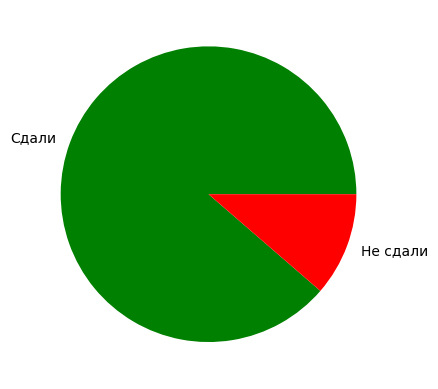

In [6]:
# Считаем количество не сдавших
failed = (table["Балл"] < table["Минимальный балл"]).sum()
# Считаем количество сдавших
passed = len(table) - failed
plt.pie(
    [passed, failed],
    labels=["Сдали", "Не сдали"],
    colors=["g", "r"],
)
None

6. Постройте ядерную оценку плотности распределению баллов за экзамен.


<Axes: ylabel='Density'>

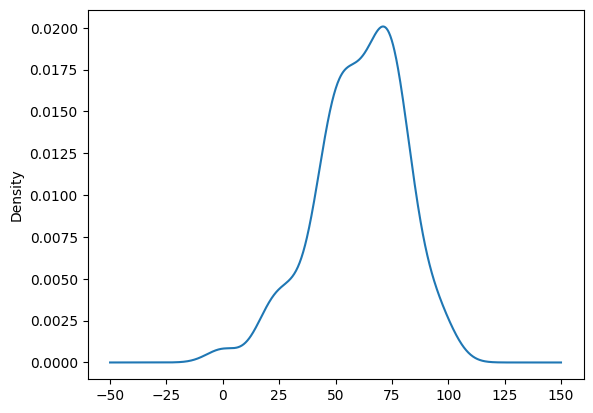

In [7]:
table["Балл"].plot.kde()

7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».


In [8]:
great = (table["Балл"] > 75).sum()
well = (table["Балл"] > 50).sum() - great
sat = (table["Балл"] > 25).sum() - great - well
unsat = len(table) - great - well - sat
good = np.array([great, well, sat, unsat]) / len(table)
print(
    "Отлично: {:.3%}\nХорошо: {:.3%}\nУдовлетворительно: {:.3%}\nНеудовлетворительно: {:.3%}\n".format(
        *good
    )
)

Отлично: 23.404%
Хорошо: 46.809%
Удовлетворительно: 24.823%
Неудовлетворительно: 4.965%



8. Какое процентное соотношение юношей и девушек писало данный экзамен?


In [9]:
male = (table["Пол"] == "М").sum()
female = (table["Пол"] == "Ж").sum()
print(f"Юноши: {male/len(table):.3%}\nДевушки: {female/len(table):.3%}")

Юноши: 77.305%
Девушки: 22.695%


9. Сколько школ принимало участие в экзамене?


In [10]:
# Берем уникальные значения из столбца с номрами школ и считаем их кол-во
len(table["№ школы"].unique())

10

10. Сколько всего заданий с кратким ответом? С развернутым ответом?


In [11]:
# short_ans_count = len(table['Задания с кратким ответом'].iloc[0])
long_ans = len(table['Задания с развёрнутым ответом'].iloc[0])//4
short_ans = len(table['Задания с кратким ответом'].iloc[0])
print(f"Задания с длинным ответом {long_ans}\nЗадания с коротким ответом {short_ans}")

Задания с длинным ответом 4
Задания с коротким ответом 23


11. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: $В_1$, ... $В_к$ Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.


In [12]:
typeB = pd.DataFrame([*table['Задания с кратким ответом'].map(list).values])
typeB

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,-,-,-,+,-,-,-,+,-,+,...,-,-,-,-,-,-,-,-,-,-
3,-,-,-,+,-,-,-,-,-,-,...,+,+,-,-,-,-,-,-,-,-
4,-,-,-,-,+,-,-,-,-,-,...,-,+,-,-,-,-,-,+,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,+,+,+,+,+,+,+,+,+,+,...,+,+,+,+,+,+,-,-,+,+
137,+,+,+,+,+,+,+,+,+,+,...,+,+,+,+,+,+,+,+,+,+
138,+,+,+,+,+,+,+,+,+,+,...,+,+,+,+,+,+,-,+,+,+
139,-,+,+,+,+,+,+,+,+,+,...,+,+,+,+,+,+,+,+,+,+


In [13]:
# Считаем процент выполненых (+ или 1)
(((typeB == "+") | (typeB == '1')).sum()/len(typeB)).map(lambda x: f"{x:.3%}")

0     81.560%
1     60.993%
2     79.433%
3     78.723%
4     68.085%
5     61.702%
6     92.199%
7     86.525%
8     49.645%
9     59.574%
10    43.262%
11    53.901%
12    60.993%
13    76.596%
14    71.631%
15    62.411%
16    68.085%
17    31.206%
18    68.085%
19    12.766%
20    34.043%
21    36.879%
22    17.730%
dtype: object

12. Аналогично и с типом С (ответы с развернутым ответом)


In [14]:
# Берем все задания с развернутым ответом, и приводим к новому датафрейму
# Новый датасет содержит данные на сколько выполнено задание

def parse_C(value):
    a = np.array(list(map(int, value[::4])))
    t = np.array(list(map(int, value[2::4])))
    return a / t
typeC = pd.DataFrame([*table['Задания с развёрнутым ответом'].map(parse_C).values])
typeC

,0,1,2,3
0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.0
...,...,...,...,...
136,1.0,1.0,1.000000,1.0
137,1.0,1.0,0.666667,1.0
138,1.0,1.0,1.000000,1.0
139,1.0,1.0,1.000000,1.0


In [15]:
# Вычисляем процентное соотношение и выводим в соответствующем виде
((typeC == 1).sum()/len(typeC)).map(lambda x: f"{x:.3%}")

0    37.589%
1    34.043%
2    17.021%
3     6.383%
dtype: object

13. Сделайте анализ по двум школам:
    1. по всем выполненным заданиям типа В
    2. по заданиям типа С больше 50%
    3. по среднему баллу юношей и девушек


In [16]:
school1 = table[table['№ школы'] == table['№ школы'].unique()[0]]
school2 = table[table['№ школы'] == table['№ школы'].unique()[1]]

In [17]:
def mean_score(df):
    # Средний балл юношей и девушек
    male = df[df['Пол'] == 'М']['Балл'].mean()
    female = df[df['Пол'] == 'Ж']['Балл'].mean()
    return male, female

## Школа 1

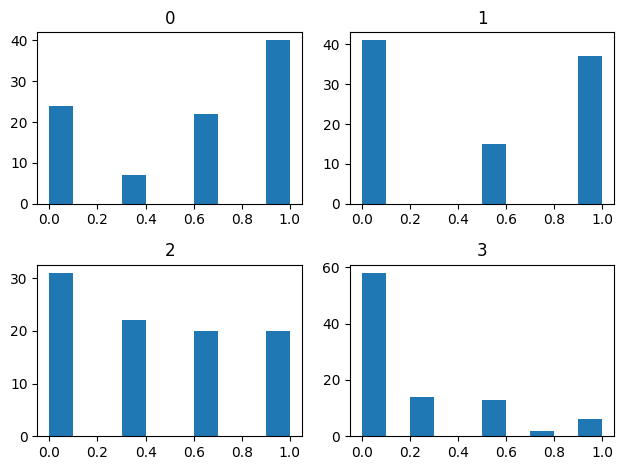

In [18]:
# Смотрим для школы гистограмму решенных C
typeC[(table['№ школы'] == table['№ школы'].unique()[0]).values].hist(grid=False)
plt.tight_layout()

<Axes: >

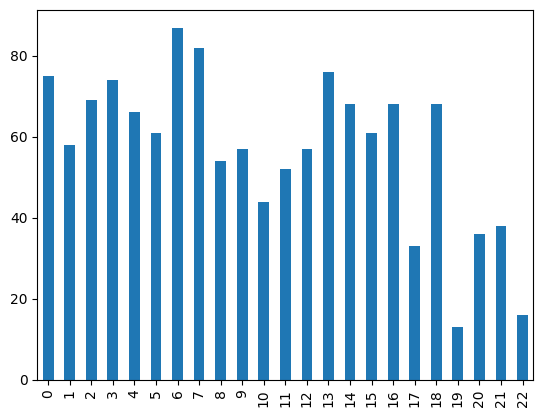

In [19]:
# Количество выполненых заданий B
data = typeB[(table['№ школы'] == table['№ школы'].unique()[0]).values]
((data == '+') | (data == '1')).sum().plot.bar()

In [20]:
# Средний балл среди юношей и девушек
print("Средний балл\nЮношей: {:.3f}\nДевушек: {:.3f}".format(*mean_score(school1)))

Средний балл
Юношей: 61.833
Девушек: 67.519


## Школа 1

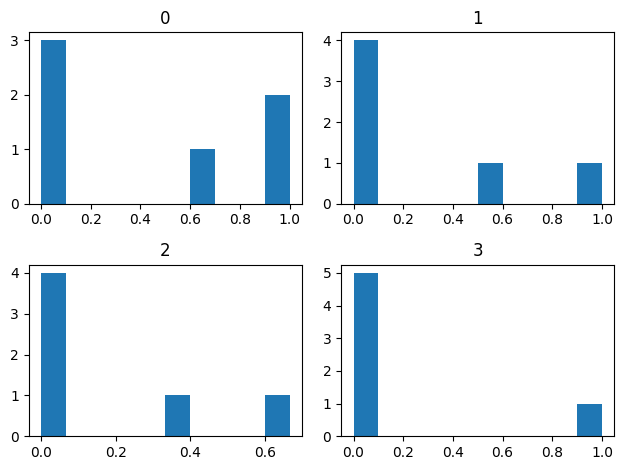

In [21]:
# Смотрим для школы гистограмму решенных C
typeC[(table['№ школы'] == table['№ школы'].unique()[1]).values].hist(grid=False)
plt.tight_layout()

<Axes: >

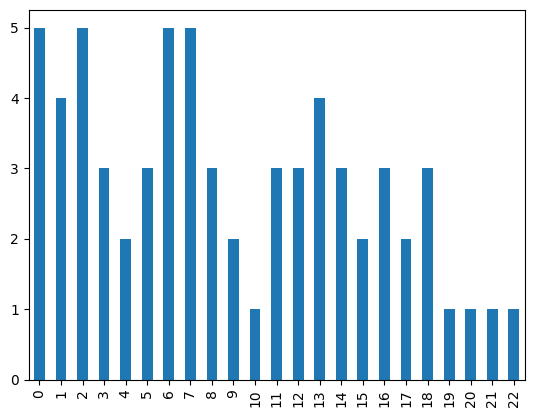

In [22]:
# Количество выполненых заданий B
data = typeB[(table['№ школы'] == table['№ школы'].unique()[1]).values]
((data == '+') | (data == '1')).sum().plot.bar()

In [23]:
# Средний балл среди юношей и девушек
print("Средний балл\nЮношей: {:.3f}\nДевушек: {:.3f}".format(*mean_score(school2)))

Средний балл
Юношей: 50.000
Девушек: nan
